# Imports

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import mean_squared_error as mse
import pickle

In [4]:
timetables = pd.read_csv("csv/Timetables rated.csv")

In [5]:
timetables

,Table,C/semester,off days,total sessions,Average unit load,sess/popday,Sess/day,Session Coef,number of breaks,total breaks,...,Largest Block,Norm Block,Early Sessions,Late Sessions,Late Days,Late/day,Combined Score,Intuitive rating,Rating,Score based Rating
0,ISMS_21_1_100,9,0,23,2.555556,4.6,4.6,1.000000,5,6,...,4,0.2500,4,5,3,1.666667,NaN,Bad,0,NaN
1,ISMS_21_1_200,10,0,23,2.300000,4.6,4.6,1.000000,4,7,...,4,0.2500,5,3,3,1.000000,NaN,Bad,0,NaN
2,ISMS_21_1_300,7,1,16,2.285714,4.0,3.2,1.250000,2,6,...,4,0.2500,3,2,2,1.000000,NaN,Bad,0,NaN
3,ISMS_21_1_400_12,5,1,12,2.400000,3.0,2.4,1.250000,0,0,...,4,0.2500,1,2,1,2.000000,NaN,Good,1,NaN
4,ISMS_21_1_400_23,5,0,12,2.400000,2.4,2.4,1.000000,0,0,...,3,0.0625,1,0,0,0.000000,NaN,Good,1,NaN
5,ISMS_21_1_400_31,5,0,12,2.400000,2.4,2.4,1.000000,0,0,...,3,0.0625,1,2,1,2.000000,NaN,Good,1,NaN
6,ISMS_21_1_400_321,6,0,14,2.333333,2.8,2.8,1.000000,0,0,...,4,0.2500,1,2,1,2.000000,NaN,Good,1,NaN
7,ISMS_21_2_100,11,0,26,2.363636,5.2,5.2,1.000000,5,6,...,4,0.2500,2,7,4,1.750000,NaN,Good-N,1,NaN
8,ISMS_22_1_200,10,0,23,2.300000,4.6,4.6,1.000000,3,4,...,4,0.2500,5,3,3,1.000000,NaN,Bad,0,NaN
9,ISMS_22_1_300,8,1,18,2.250000,4.5,3.6,1.250000,1,1,...,6,1.0000,2,4,3,1.333333,NaN,Bad,0,NaN


# Preprocessing and Feature Engineering

In [6]:
timetables['Avg Break'] = timetables['total breaks'] / timetables['number of breaks']

## Dropping redundant/ not useful values

In [7]:
table1 =timetables.drop(['Table','total breaks','number of breaks','Sess/day','Late Sessions', 'Late Days', 'off days', 'Session Coef', 'Length of breaks', 'Blocks/day','Average unit load','Largest Block','Intuitive rating'], axis = 1)

In [8]:
tablename = timetables['Table']

In [9]:
table1.to_csv('TimetablesB.csv')

## Replacing NaN values

In [10]:
table1 = table1.replace(np.nan, 0)

In [11]:
table1.head()

,C/semester,total sessions,sess/popday,Number of Blocks,Block/pday,Avergae Block size,Norm Block,Early Sessions,Late/day,Combined Score,Rating,Score based Rating,Avg Break
0,9,23,4.6,10,2.0,2.300000,0.2500,4,1.666667,0.0,0,0.0,1.20
1,10,23,4.6,9,1.8,2.555556,0.2500,5,1.000000,0.0,0,0.0,1.75
2,7,16,4.0,6,1.5,2.666667,0.2500,3,1.000000,0.0,0,0.0,3.00
3,5,12,3.0,4,1.0,3.000000,0.2500,1,2.000000,0.0,1,0.0,0.00
4,5,12,2.4,5,1.0,2.400000,0.0625,1,0.000000,0.0,1,0.0,0.00


## Normalising Values

In [12]:
norm_tab = (table1 - table1.min())/(table1.max()-table1.min())

In [13]:
# norm_tab = norm_tab.drop('C/semester', axis = 1)

In [14]:
norm_tab['Rating'] = norm_tab['Rating'].astype(int)

In [15]:
norm_tab['Table'] = tablename

In [16]:
norm_tab.head()

,C/semester,total sessions,sess/popday,Number of Blocks,Block/pday,Avergae Block size,Norm Block,Early Sessions,Late/day,Combined Score,Rating,Score based Rating,Avg Break,Table
0,0.714286,0.823529,0.785714,1.000000,1.0,0.206667,0.2500,0.8,0.625,NaN,0,NaN,0.342857,ISMS_21_1_100
1,0.857143,0.823529,0.785714,0.857143,0.8,0.325926,0.2500,1.0,0.375,NaN,0,NaN,0.500000,ISMS_21_1_200
2,0.428571,0.411765,0.571429,0.428571,0.5,0.377778,0.2500,0.6,0.375,NaN,0,NaN,0.857143,ISMS_21_1_300
3,0.142857,0.176471,0.214286,0.142857,0.0,0.533333,0.2500,0.2,0.750,NaN,1,NaN,0.000000,ISMS_21_1_400_12
4,0.142857,0.176471,0.000000,0.285714,0.0,0.253333,0.0625,0.2,0.000,NaN,1,NaN,0.000000,ISMS_21_1_400_23


## Feature Engineering

Note on weighting highly experimental, goals:
Punish large blocks that have large breaks
Account for Unit load

Positive qualities: Number of Blocks, Blocks per populated day, 
Neutral/Context: number of courses (denser timetables are intrinsically worse)
Negatives, everything else lmao

so the scoring equation looks something like this
s = (weighted positives)-(weighted negatives) - (block penalty) + (Course bonus)

*weighted*
Score = (No_Blocks + blocks/pday) - 
        (Average break+  Average block  + 
         Early_sessions + Late_sessions)
                  -
                  penalty
                   +
                   Bonus

Weight
Emphasising the positive things
Number of blocks: 0.3
B/day:.2

Avg breaks: -0.1
Early: - 0.15
Late: -0.25
Largest Block = -0.2
Average block = -0.1
penatlies
Large block + long breaks: 0.15
High sessions + low blocks: 0.3 (has issues)

Bonuses
Denser timetables require leeway: 0.01

        Penalty for large blocks and long breaks together
        min(Large_block_size, Large_average_breaks_size)  * W_penalty +

        # Reduce penalty based on average load (higher load reduces penalty)
        (min(Large_block_size, Large_average_breaks_size) * W_average_load * Average_load)

In [17]:
weight = (0.28, 0.18, 0.1, 0.05, 0.5, 0.3, 0.6, 0.15, 0.3, 0.03)
# In the order of the MD above

def scoring(df):
    positives = ((df['Number of Blocks'] * weight[0]) + (df['Block/pday']*weight[1]))
    
    negatives = ((df['Avg Break'] * weight[2]) + (df['Early Sessions'] * weight[3])
                 + (df['Late/day'] * weight[4]) + (df['Norm Block']* weight[5])  
                 + (df['Avergae Block size'] * weight[6]))
    
    penalty = (((df['Norm Block'] + df['Avg Break'])/4) * weight[7]) +((df['C/semester']-df['Number of Blocks'])*.6)
            #+((abs(df['Number of Blocks']-df['total sessions']).item()/df['total sessions'])*weight[8]))
    
    bonus = (df['total sessions']*weight[9])
    score = positives + bonus - penalty - negatives
    df['Combined Score'] = score
    df['raw_score'] = positives - negatives
    return df

In [18]:
weighted = scoring(norm_tab)

In [19]:
weighted.head()

,C/semester,total sessions,sess/popday,Number of Blocks,Block/pday,Avergae Block size,Norm Block,Early Sessions,Late/day,Combined Score,Rating,Score based Rating,Avg Break,Table,raw_score
0,0.714286,0.823529,0.785714,1.000000,1.0,0.206667,0.2500,0.8,0.625,0.048117,0,NaN,0.342857,ISMS_21_1_100,-0.125786
1,0.857143,0.823529,0.785714,0.857143,0.8,0.325926,0.2500,1.0,0.375,-0.177475,0,NaN,0.500000,ISMS_21_1_200,-0.174056
2,0.428571,0.411765,0.571429,0.428571,0.5,0.377778,0.2500,0.6,0.375,-0.424046,0,NaN,0.857143,ISMS_21_1_300,-0.394881
3,0.142857,0.176471,0.214286,0.142857,0.0,0.533333,0.2500,0.2,0.750,-0.744081,1,NaN,0.000000,ISMS_21_1_400_12,-0.740000
4,0.142857,0.176471,0.000000,0.285714,0.0,0.253333,0.0625,0.2,0.000,-0.012085,1,NaN,0.000000,ISMS_21_1_400_23,-0.100750


In [25]:
weighted

,C/semester,total sessions,sess/popday,Number of Blocks,Block/pday,Avergae Block size,Norm Block,Early Sessions,Late/day,Combined Score,Rating,Score based Rating,Avg Break,Table,Name,raw_score
id,,,,,,,,,,,,,,,,
0,0.714286,0.823529,0.785714,1.000000,1.000000,0.206667,0.2500,0.8,0.62500,0.909354,0,1,0.342857,ISMS_21_1_100,ISMS_21_1_100,0.925425
1,0.857143,0.823529,0.785714,0.857143,0.800000,0.325926,0.2500,1.0,0.37500,0.685568,0,1,0.500000,ISMS_21_1_200,ISMS_21_1_200,0.774731
2,0.428571,0.411765,0.571429,0.428571,0.500000,0.377778,0.2500,0.6,0.37500,0.535522,0,0,0.857143,ISMS_21_1_300,ISMS_21_1_300,0.566354
3,0.142857,0.176471,0.214286,0.142857,0.000000,0.533333,0.2500,0.2,0.75000,0.400211,1,0,0.000000,ISMS_21_1_400_12,ISMS_21_1_400_12,0.322779
4,0.142857,0.176471,0.000000,0.285714,0.000000,0.253333,0.0625,0.2,0.00000,0.782094,1,1,0.000000,ISMS_21_1_400_23,ISMS_21_1_400_23,0.821754
5,0.142857,0.176471,0.000000,0.285714,0.000000,0.253333,0.0625,0.2,0.75000,0.645900,1,1,0.000000,ISMS_21_1_400_31,ISMS_21_1_400_31,0.605685
6,0.285714,0.294118,0.142857,0.285714,0.000000,0.440000,0.2500,0.2,0.75000,0.472506,1,0,0.000000,ISMS_21_1_400_321,ISMS_21_1_400_321,0.433406
7,1.000000,1.000000,1.000000,1.000000,1.000000,0.346667,0.2500,0.4,0.65625,0.765572,1,1,0.342857,ISMS_21_2_100,ISMS_21_2_100,0.888766
8,0.857143,0.823529,0.785714,0.428571,0.200000,0.922222,0.2500,1.0,0.37500,0.085191,0,0,0.380952,ISMS_22_1_200,ISMS_22_1_200,0.113419


In [20]:
weighted['Combined Score'].max()


0.15166115189768015

In [23]:
weighted['Combined Score'] = (weighted['Combined Score'] - weighted['Combined Score'].min())/(weighted['Combined Score'].max()-weighted['Combined Score'].min())

## parameter checking

In [24]:
weighted['Combined Score'].max()

1.0

In [25]:
weighted['Combined Score'].min()

0.0

In [26]:
weighted['Combined Score'].median()

0.624236149627988

In [27]:
weighted['Score based Rating'].mean()

nan

In [28]:
weighted['Combined Score'].mean()

0.5978419936766155

## Label Encoding

In [29]:
above_median = weighted['Combined Score'] >= weighted['Combined Score'].median() - 0.02

weighted['Score based Rating'] = np.where(above_median, 1, 0)

In [30]:
weighted.head()

,C/semester,total sessions,sess/popday,Number of Blocks,Block/pday,Avergae Block size,Norm Block,Early Sessions,Late/day,Combined Score,Rating,Score based Rating,Avg Break,Table,raw_score
0,0.714286,0.823529,0.785714,1.000000,1.0,0.206667,0.2500,0.8,0.625,0.924480,0,1,0.342857,ISMS_21_1_100,-0.125786
1,0.857143,0.823529,0.785714,0.857143,0.8,0.325926,0.2500,1.0,0.375,0.759947,0,1,0.500000,ISMS_21_1_200,-0.174056
2,0.428571,0.411765,0.571429,0.428571,0.5,0.377778,0.2500,0.6,0.375,0.580112,0,0,0.857143,ISMS_21_1_300,-0.394881
3,0.142857,0.176471,0.214286,0.142857,0.0,0.533333,0.2500,0.2,0.750,0.346697,1,0,0.000000,ISMS_21_1_400_12,-0.740000
4,0.142857,0.176471,0.000000,0.285714,0.0,0.253333,0.0625,0.2,0.000,0.880573,1,1,0.000000,ISMS_21_1_400_23,-0.100750


In [500]:
weighted['Name'] = tablename

In [501]:

weighted

,C/semester,total sessions,sess/popday,Number of Blocks,Block/pday,Avergae Block size,Norm Block,Early Sessions,Late/day,Combined Score,Rating,Score based Rating,Avg Break,Table,Name,raw_score
0,0.714286,0.823529,0.785714,1.000000,1.000000,0.206667,0.2500,0.8,0.62500,0.909354,0,1,0.342857,ISMS_21_1_100,ISMS_21_1_100,-0.024536
1,0.857143,0.823529,0.785714,0.857143,0.800000,0.325926,0.2500,1.0,0.37500,0.685568,0,1,0.500000,ISMS_21_1_200,ISMS_21_1_200,-0.155306
2,0.428571,0.411765,0.571429,0.428571,0.500000,0.377778,0.2500,0.6,0.37500,0.535522,0,0,0.857143,ISMS_21_1_300,ISMS_21_1_300,-0.336131
3,0.142857,0.176471,0.214286,0.142857,0.000000,0.533333,0.2500,0.2,0.75000,0.400211,1,0,0.000000,ISMS_21_1_400_12,ISMS_21_1_400_12,-0.547500
4,0.142857,0.176471,0.000000,0.285714,0.000000,0.253333,0.0625,0.2,0.00000,0.782094,1,1,0.000000,ISMS_21_1_400_23,ISMS_21_1_400_23,-0.114500
5,0.142857,0.176471,0.000000,0.285714,0.000000,0.253333,0.0625,0.2,0.75000,0.645900,1,1,0.000000,ISMS_21_1_400_31,ISMS_21_1_400_31,-0.302000
6,0.285714,0.294118,0.142857,0.285714,0.000000,0.440000,0.2500,0.2,0.75000,0.472506,1,0,0.000000,ISMS_21_1_400_321,ISMS_21_1_400_321,-0.451500
7,1.000000,1.000000,1.000000,1.000000,1.000000,0.346667,0.2500,0.4,0.65625,0.765572,1,1,0.342857,ISMS_21_2_100,ISMS_21_2_100,-0.056348
8,0.857143,0.823529,0.785714,0.428571,0.200000,0.922222,0.2500,1.0,0.37500,0.085191,0,0,0.380952,ISMS_22_1_200,ISMS_22_1_200,-0.729179
9,0.571429,0.529412,0.750000,0.285714,0.250000,0.813333,1.0000,0.4,0.50000,0.088782,0,0,0.285714,ISMS_22_1_300,ISMS_22_1_300,-0.776571


# Data stuff

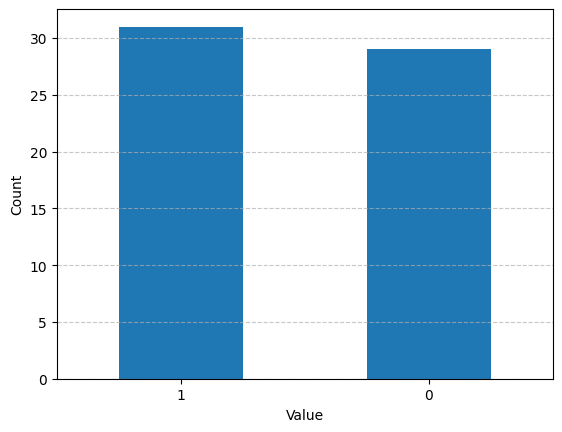

In [502]:
import matplotlib.pyplot as plt
val_count = weighted['Score based Rating'].value_counts()
plt.figure()
val_count.plot(kind='bar')
plt.xlabel("Value")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

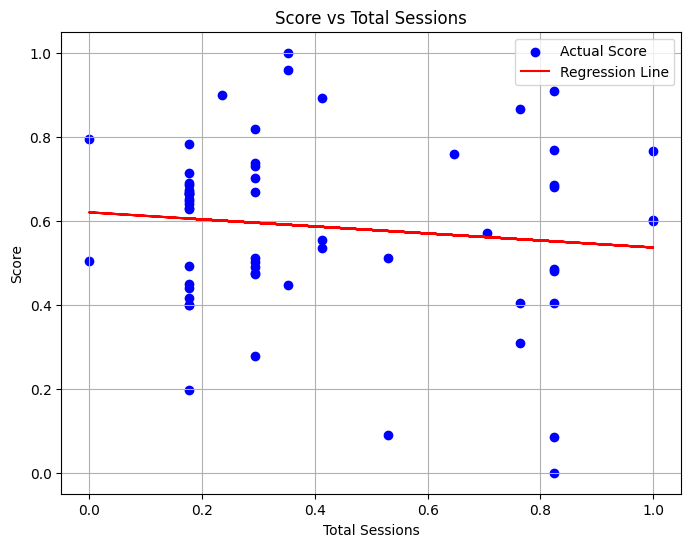

In [503]:
from sklearn.linear_model import LinearRegression

X = weighted[['total sessions']]  # Feature (independent variable)
y = weighted['Combined Score']  # Target variable (dependent variable)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the regression coefficients (slope and intercept)
slope = model.coef_[0]
intercept = model.intercept_

# Predict scores based on total sessions
predicted_scores = model.predict(X)

# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Score')  # Scatter plot for actual data
plt.plot(X, predicted_scores, color='red', label='Regression Line')  # Plot the regression line
plt.title("Score vs Total Sessions")
plt.xlabel("Total Sessions")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

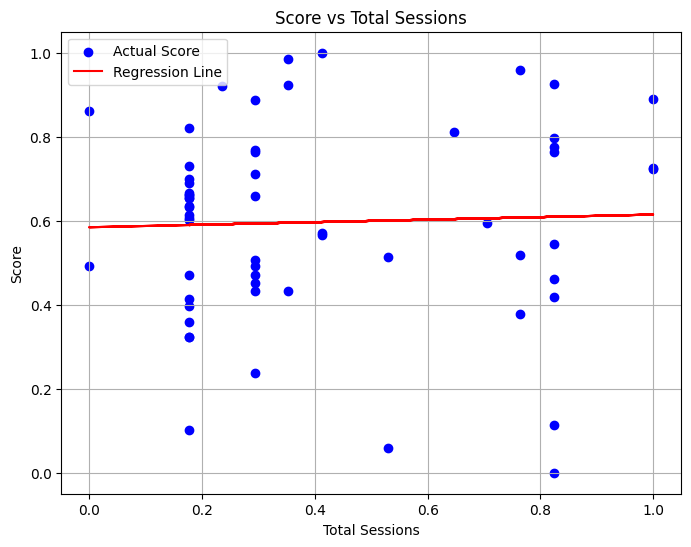

In [504]:
weighted['raw_score'] = (weighted['raw_score'] - weighted['raw_score'].min())/(weighted['raw_score'].max()-weighted['raw_score'].min())
from sklearn.linear_model import LinearRegression

X = weighted[['total sessions']]  # Feature (independent variable)
y = weighted['raw_score']  # Target variable (dependent variable)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the regression coefficients (slope and intercept)
slope = model.coef_[0]
intercept = model.intercept_

# Predict scores based on total sessions
predicted_scores = model.predict(X)

# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Score')  # Scatter plot for actual data
plt.plot(X, predicted_scores, color='red', label='Regression Line')  # Plot the regression line
plt.title("Score vs Total Sessions")
plt.xlabel("Total Sessions")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

There is a correlation between the number of courses and the quality of a timetable, as well as an unintential correlation to positive aspects of timetables. 
The weighting of the data has been adjusted to minimise the bias as much as possible. The rw scores (without penalties or the leeway bonus demonstrate a slight undue bias towards )

# Modelling

In [2]:
weighted = pd.read_csv('csv/WeightNormTimetables.csv', index_col=0)
weighted.head()

,C/semester,total sessions,sess/popday,Number of Blocks,Block/pday,Avergae Block size,Norm Block,Early Sessions,Late/day,Combined Score,Rating,Score based Rating,Avg Break,Table,Name,raw_score
id,,,,,,,,,,,,,,,,
0,0.714286,0.823529,0.785714,1.000000,1.0,0.206667,0.2500,0.8,0.625,0.909354,0,1,0.342857,ISMS_21_1_100,ISMS_21_1_100,0.925425
1,0.857143,0.823529,0.785714,0.857143,0.8,0.325926,0.2500,1.0,0.375,0.685568,0,1,0.500000,ISMS_21_1_200,ISMS_21_1_200,0.774731
2,0.428571,0.411765,0.571429,0.428571,0.5,0.377778,0.2500,0.6,0.375,0.535522,0,0,0.857143,ISMS_21_1_300,ISMS_21_1_300,0.566354
3,0.142857,0.176471,0.214286,0.142857,0.0,0.533333,0.2500,0.2,0.750,0.400211,1,0,0.000000,ISMS_21_1_400_12,ISMS_21_1_400_12,0.322779
4,0.142857,0.176471,0.000000,0.285714,0.0,0.253333,0.0625,0.2,0.000,0.782094,1,1,0.000000,ISMS_21_1_400_23,ISMS_21_1_400_23,0.821754


This one below is for reference

In [32]:
weighted.head()

,C/semester,total sessions,sess/popday,Number of Blocks,Block/pday,Avergae Block size,Norm Block,Early Sessions,Late/day,Combined Score,Rating,Score based Rating,Avg Break,Table,raw_score
0,0.714286,0.823529,0.785714,1.000000,1.0,0.206667,0.2500,0.8,0.625,0.924480,0,1,0.342857,ISMS_21_1_100,-0.125786
1,0.857143,0.823529,0.785714,0.857143,0.8,0.325926,0.2500,1.0,0.375,0.759947,0,1,0.500000,ISMS_21_1_200,-0.174056
2,0.428571,0.411765,0.571429,0.428571,0.5,0.377778,0.2500,0.6,0.375,0.580112,0,0,0.857143,ISMS_21_1_300,-0.394881
3,0.142857,0.176471,0.214286,0.142857,0.0,0.533333,0.2500,0.2,0.750,0.346697,1,0,0.000000,ISMS_21_1_400_12,-0.740000
4,0.142857,0.176471,0.000000,0.285714,0.0,0.253333,0.0625,0.2,0.000,0.880573,1,1,0.000000,ISMS_21_1_400_23,-0.100750


In [37]:
builder = weighted.drop(['raw_score','Rating','C/semester','Combined Score'], axis = 1)
builder.head()

,total sessions,sess/popday,Number of Blocks,Block/pday,Avergae Block size,Norm Block,Early Sessions,Late/day,Score based Rating,Avg Break,Table
0,0.823529,0.785714,1.000000,1.0,0.206667,0.2500,0.8,0.625,1,0.342857,ISMS_21_1_100
1,0.823529,0.785714,0.857143,0.8,0.325926,0.2500,1.0,0.375,1,0.500000,ISMS_21_1_200
2,0.411765,0.571429,0.428571,0.5,0.377778,0.2500,0.6,0.375,0,0.857143,ISMS_21_1_300
3,0.176471,0.214286,0.142857,0.0,0.533333,0.2500,0.2,0.750,0,0.000000,ISMS_21_1_400_12
4,0.176471,0.000000,0.285714,0.0,0.253333,0.0625,0.2,0.000,1,0.000000,ISMS_21_1_400_23


In [62]:
from sklearn.model_selection import train_test_split
y = builder['Score based Rating']
X = builder.drop(['Score based Rating'], axis = 1)
X_test = X.drop(['Table'], axis = 1)
X

,total sessions,sess/popday,Number of Blocks,Block/pday,Avergae Block size,Norm Block,Early Sessions,Late/day,Avg Break,Table
0,0.823529,0.785714,1.000000,1.000000,0.206667,0.2500,0.8,0.62500,0.342857,ISMS_21_1_100
1,0.823529,0.785714,0.857143,0.800000,0.325926,0.2500,1.0,0.37500,0.500000,ISMS_21_1_200
2,0.411765,0.571429,0.428571,0.500000,0.377778,0.2500,0.6,0.37500,0.857143,ISMS_21_1_300
3,0.176471,0.214286,0.142857,0.000000,0.533333,0.2500,0.2,0.75000,0.000000,ISMS_21_1_400_12
4,0.176471,0.000000,0.285714,0.000000,0.253333,0.0625,0.2,0.00000,0.000000,ISMS_21_1_400_23
5,0.176471,0.000000,0.285714,0.000000,0.253333,0.0625,0.2,0.75000,0.000000,ISMS_21_1_400_31
6,0.294118,0.142857,0.285714,0.000000,0.440000,0.2500,0.2,0.75000,0.000000,ISMS_21_1_400_321
7,1.000000,1.000000,1.000000,1.000000,0.346667,0.2500,0.4,0.65625,0.342857,ISMS_21_2_100
8,0.823529,0.785714,0.428571,0.200000,0.922222,0.2500,1.0,0.37500,0.380952,ISMS_22_1_200
9,0.529412,0.750000,0.285714,0.250000,0.813333,1.0000,0.4,0.50000,0.285714,ISMS_22_1_300


## Main Model

In [46]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, y, train_size=0.8, test_size=0.1, random_state=5)

In [47]:
train_name = X_train['Table']
valid_name = X_valid['Table']
X_train = X_train.drop(['Table'], axis = 1)
X_valid = X_valid.drop(['Table'], axis  = 1)

X_comp = pd.concat([X_train,X_valid], axis = 0, ignore_index = True)

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 20, n_jobs = -1, n_estimators = 100, bootstrap = True, max_depth = 50, max_features = 9)
rfc.fit(X_train, Y_train)

pred_valid_rf = rfc.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y, pred_valid_rf))

0.9833333333333333


In [519]:
X_valid.columns.values

array(['total sessions', 'sess/popday', 'Number of Blocks', 'Block/pday',
       'Avergae Block size', 'Norm Block', 'Early Sessions', 'Late/day',
       'Avg Break'], dtype=object)

In [523]:
rfc.feature_names_in_

array(['total sessions', 'sess/popday', 'Number of Blocks', 'Block/pday',
       'Avergae Block size', 'Norm Block', 'Early Sessions', 'Late/day',
       'Avg Break'], dtype=object)

In [514]:
comp_name = pd.concat([train_name,valid_name], ignore_index = True)

## More Models!

In [5]:
X.head()

,total sessions,sess/popday,Number of Blocks,Block/pday,Avergae Block size,Norm Block,Early Sessions,Late/day,Avg Break,Name
id,,,,,,,,,,
0,0.823529,0.785714,1.000000,1.0,0.206667,0.2500,0.8,0.625,0.342857,ISMS_21_1_100
1,0.823529,0.785714,0.857143,0.8,0.325926,0.2500,1.0,0.375,0.500000,ISMS_21_1_200
2,0.411765,0.571429,0.428571,0.5,0.377778,0.2500,0.6,0.375,0.857143,ISMS_21_1_300
3,0.176471,0.214286,0.142857,0.0,0.533333,0.2500,0.2,0.750,0.000000,ISMS_21_1_400_12
4,0.176471,0.000000,0.285714,0.0,0.253333,0.0625,0.2,0.000,0.000000,ISMS_21_1_400_23


The intention here is to create predictive models that look at certain qualities of the tt. they are really only called when a Timetable is deemed bad.

### Breaks

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
br = X['Avg Break']
bry = y
br =br.to_frame()
br_train, br_valid, bry_train, bry_valid = train_test_split(br, bry, train_size=0.8, test_size=0.1, random_state=5)
brm = LogisticRegression(max_iter=10)
brm.fit(br_train,bry_train)
rly = brm.predict(br)
print(accuracy_score(y, rly))


0.6166666666666667


Not a reliable indicator, saving none the less, not by design. but the problems with breaks is actually represented by a different stat

In [55]:
pickle.dump(brm,open('Breakmodel.sav', 'wb'))

### Block Modelling

In [53]:
from sklearn.ensemble import RandomForestClassifier
cols = ['Number of Blocks','Block/pday','Avergae Block size','Norm Block']
bl = pd.DataFrame(X,columns= cols)
bly = y
bl_train, bl_valid, bly_train, bly_valid = train_test_split(bl, bly, train_size=0.8, test_size=0.1, random_state=5)

blm  = RandomForestClassifier(random_state = 20, n_jobs = -1, n_estimators = 100, bootstrap = True, max_depth = 50, max_features = 9)
blm.fit(bl_train,bly_train)
rry = blm.predict(bl)
print(accuracy_score(y,rry))

0.9666666666666667


So Block stats are an almost perfect indicator of timetable quality, which makes sense, and is by design, in line with research. However the 100% accuracy could be a problem. It is however the bulk of the data so yh


In [54]:
pickle.dump(blm,open('BlockModel.sav', 'wb'))

## Sessions/Freeday Modelling

In [56]:
cols = ['total sessions', 'sess/popday']
se = pd.DataFrame(X, columns = cols)
sey = y

sem  = RandomForestClassifier(random_state = 20, n_jobs = -1, n_estimators = 100, bootstrap = True, max_depth = 50, max_features = 2)
sem.fit(se, sey)
ser = sem.predict(se)
print(accuracy_score(ser,sey))

0.7166666666666667


Decent prediction,  not enough to be perfect indicators on their own, this is also by design as Timetable density affects other qualities. important to factor in for context though

In [57]:
pickle.dump(sem,open('SessionsModel.sav','wb'))

## Timing modelling

In [58]:
cols = ['Early Sessions', 'Late/day']
el = pd.DataFrame(X, columns = cols)
ely = y

elm  = RandomForestClassifier(random_state = 20, n_jobs = -1, n_estimators = 100, bootstrap = True, max_depth = 50, max_features = 2)
elm.fit(el, ely)
elr = elm.predict(el)
print(accuracy_score(elr,ely))

0.8333333333333334


Strong prediction albeit imperfect. Not by design.

In [59]:
pickle.dump(elm,open('Early-LateModel.sav','wb'))

# Saving stuff for later use

In [51]:
filename = 'Learned.sav'
pickle.dump(rfc,open(filename, 'wb'))

In [60]:
weighted.to_csv('WeightNormTimetables.csv', index_label = 'id')